In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Online-Chess Dataset

In [2]:
dt = pd.read_csv('chess_games.csv',index_col=0)
dt.head(2)

rated  turns victory_status winner time_increment  white_id  \
game_id                                                                
1        False     13    Out of Time  White           15+2  bourgris   
2         True     16         Resign  Black           5+10      a-00   

         white_rating   black_id  black_rating  \
game_id                                          
1                1500       a-00          1191   
2                1322  skinnerua          1261   

                                                     moves opening_code  \
game_id                                                                   
1        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...          D10   
2        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...          B00   

         opening_moves                        opening_fullname  \
game_id                                                          
1                    5        Slav Defense: Exchange Variation   
2                    4  Nimzowitsch Defense: Kennedy Variation   

           opening_shortname opening_response   opening_variation  
game_id                                                            
1               Slav Defense              NaN  Exchange Variation  
2        Nimzowitsch Defense              NaN   Kennedy Variation

In [3]:
dt.shape

(20058, 16)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20058 entries, 1 to 20058
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   time_increment     20058 non-null  object
 5   white_id           20058 non-null  object
 6   white_rating       20058 non-null  int64 
 7   black_id           20058 non-null  object
 8   black_rating       20058 non-null  int64 
 9   moves              20058 non-null  object
 10  opening_code       20058 non-null  object
 11  opening_moves      20058 non-null  int64 
 12  opening_fullname   20058 non-null  object
 13  opening_shortname  20058 non-null  object
 14  opening_response   1207 non-null   object
 15  opening_variation  14398 non-null  object
dtypes: bool(1), int64(4), object(11)
memory 

## Data Description:

In [5]:
dt.describe()

turns  white_rating  black_rating  opening_moves
count  20058.000000  20058.000000  20058.000000   20058.000000
mean      60.465999   1596.631868   1588.831987       4.816981
std       33.570585    291.253376    291.036126       2.797152
min        1.000000    784.000000    789.000000       1.000000
25%       37.000000   1398.000000   1391.000000       3.000000
50%       55.000000   1567.000000   1562.000000       4.000000
75%       79.000000   1793.000000   1784.000000       6.000000
max      349.000000   2700.000000   2723.000000      28.000000

In [6]:
dt.describe(include='object')

victory_status winner time_increment white_id black_id  moves  \
count           20058  20058          20058    20058    20058  20058   
unique              4      3            400     9438     9331  18920   
top            Resign  White           10+0  taranga  taranga  e4 e5   
freq            11147  10001           7721       72       82     27   

       opening_code      opening_fullname opening_shortname opening_response  \
count         20058                 20058             20058             1207   
unique          365                  1477               128                3   
top             A00  Van't Kruijs Opening  Sicilian Defense         Declined   
freq           1007                   368              2632              503   

       opening_variation  
count              14398  
unique               615  
top                   #2  
freq                 797

##  Preprocessing

### 1.Checking and Handling of missing values

In [7]:
dt.isnull().sum()

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

### Findings:

In [8]:
dt=dt.drop(['opening_response'],axis=1)
dt['opening_variation'].fillna(dt['opening_variation'].mode()[0],inplace=True)

In [9]:
dt.shape

(20058, 15)

In [10]:
dt.isnull().sum()

rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
moves                0
opening_code         0
opening_moves        0
opening_fullname     0
opening_shortname    0
opening_variation    0
dtype: int64

### 2.Handling for outliers

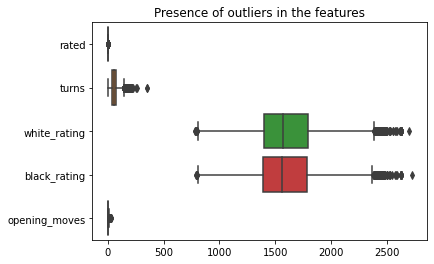

In [11]:
sns.boxplot(data=dt,orient='h')
plt.title('Presence of outliers in the features')
plt.show()

In [12]:
dt['rated'].value_counts()

True     16155
False     3903
Name: rated, dtype: int64

**Rated columns contain only true & false readings. i.e; it doesnt contain any valid outliers**

### Removing outliers in the feature 'Turns','white_rating','black_rating' and 'opening_moves'

In [13]:
out=['turns','white_rating','black_rating','opening_moves']
ind1,ind2,i1,i2=[],[],[],[]

for i in out:
    print('Handling outliers in',i.upper(),'COLUMN: \n')
    Q1 = np.percentile(dt[i],25,interpolation='midpoint')
    Q2 = np.percentile(dt[i],50,interpolation='midpoint')
    Q3 = np.percentile(dt[i],75,interpolation='midpoint')
    IQR = Q3 - Q1
    low_limit = Q1 - IQR*1.5
    up_limit = Q3 + IQR*1.5
    
    print('The values below',low_limit,'and above',up_limit,'are outliers.')
    
    outlier = []
    for x in dt[i]:
        if((x > up_limit) or (x < low_limit)):
            outlier.append(x)
    
    print('There are',len(outlier),'outliers in',i,'column.')
    
    ind1,ind2=dt[i]>up_limit, dt[i]
    i1=dt.loc[ind1].index
    
    dt.drop(i1,inplace=True)
    
    print('Shape of dataset after removal of outliers in',i.upper(),'column:',dt.shape,'\n\n')

Handling outliers in TURNS COLUMN: 

The values below -26.0 and above 142.0 are outliers.
There are 428 outliers in turns column.
Shape of dataset after removal of outliers in TURNS column: (19630, 15) 


Handling outliers in WHITE_RATING COLUMN: 

The values below 804.0 and above 2380.0 are outliers.
There are 131 outliers in white_rating column.
Shape of dataset after removal of outliers in WHITE_RATING column: (19506, 15) 


Handling outliers in BLACK_RATING COLUMN: 

The values below 803.0 and above 2363.0 are outliers.
There are 87 outliers in black_rating column.
Shape of dataset after removal of outliers in BLACK_RATING column: (19425, 15) 


Handling outliers in OPENING_MOVES COLUMN: 

The values below -1.5 and above 10.5 are outliers.
There are 844 outliers in opening_moves column.
Shape of dataset after removal of outliers in OPENING_MOVES column: (18581, 15) 




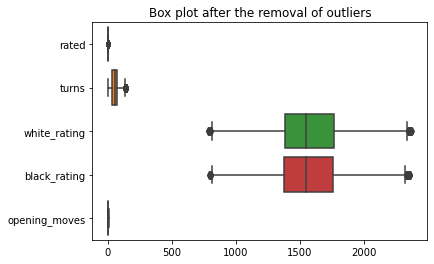

In [14]:
sns.boxplot(data=dt,orient='h')
plt.title('Box plot after the removal of outliers')
plt.show()

### 3.Standard scaling on features

In [15]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
s=dt[['turns','white_rating','black_rating','opening_moves']]
s=standardisation.fit_transform(s)

In [16]:
s=pd.DataFrame(s)
s.columns=['turns','white_rating','black_rating','opening_moves']
s.describe().round(2)

turns  white_rating  black_rating  opening_moves
count  18581.00      18581.00      18581.00       18581.00
mean       0.00          0.00         -0.00          -0.00
std        1.00          1.00          1.00           1.00
min       -1.89         -2.85         -2.78          -1.55
25%       -0.73         -0.69         -0.68          -0.65
50%       -0.13         -0.09         -0.09          -0.20
75%        0.60          0.68          0.66           0.71
max        2.78          2.87          2.81           2.51

# Exploratory Data Analysis (EDA)

In [17]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [19]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


## 1. What percentage of games were won by White ? How many ended in draw ?

In [20]:
winners=pd.DataFrame(dt['winner'].value_counts().reset_index().rename(columns={'index':'Winner','winner':'Count'}))
winners

Winner  Count
0  White   9318
1  Black   8479
2   Draw    784

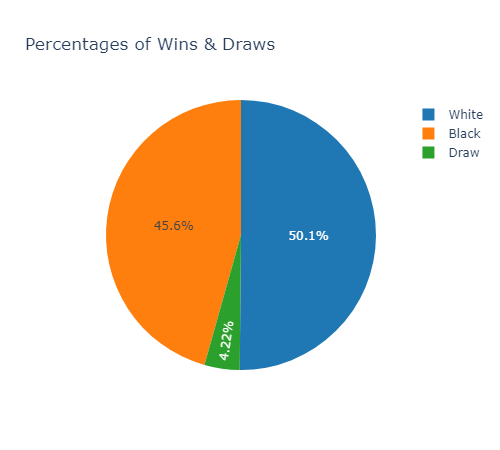

In [21]:
fig=px.pie(winners,
      title='Percentages of Wins & Draws',names='Winner',values='Count',
      color_discrete_sequence=px.colors.qualitative.D3,
      height=450,
      width=500)
fig.show('png')

**Insight**:  With this pie chart, we can see that almost half (50.1%) of all games were won with the white pieces, 45.6% by black, and 4.22% games ended in a draw.

## 2. Proportion of winners accoding to piece colour of winner and victory_status

In [22]:
winner_status=(pd.DataFrame(dt[['winner','victory_status']].value_counts()).reset_index().rename(columns={'Count':'winner',0:'count'}))
winner_status=winner_status[~(winner_status['winner']=='Draw')]
winner_status

winner victory_status  count
0  White         Resign   5459
1  Black         Resign   4938
2  White           Mate   3124
3  Black           Mate   2796
5  Black    Out of Time    745
6  White    Out of Time    735

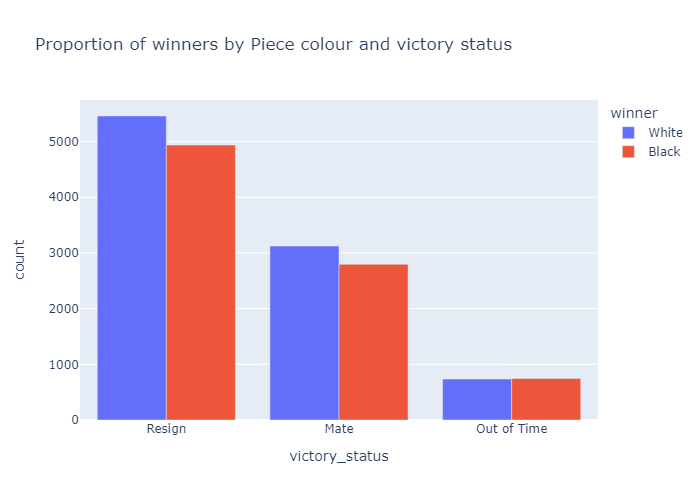

In [23]:
fig=px.bar(winner_status,
      title='Proportion of winners by Piece colour and victory status',
      x='victory_status',
      y='count',
      color='winner',
      barmode='group',
      height=500,
      width=700)
fig.show('png')

**Insights:**

## 3. How many times the winner was the one that has higest rate

In [24]:
rate_win=dt[["winner","white_rating","black_rating"]]
rate_win.head()

winner  white_rating  black_rating
game_id                                   
1        White          1500          1191
2        Black          1322          1261
3        White          1496          1500
4        White          1439          1454
5        White          1523          1469

In [25]:
rate_win["w_r>b_r"]=(rate_win["white_rating"] > rate_win["black_rating"])
rate_win.head()

winner  white_rating  black_rating  w_r>b_r
game_id                                            
1        White          1500          1191     True
2        Black          1322          1261     True
3        White          1496          1500    False
4        White          1439          1454    False
5        White          1523          1469     True

In [26]:
win_rate_stat=((rate_win["winner"]=="White")&(rate_win["w_r>b_r"]==True)) | ((rate_win["winner"]=="Black")&(rate_win["w_r>b_r"]==False))
rate_win["win_rate_status"]="low_rank win"
rate_win.loc[win_rate_stat,"win_rate_status"]="high_rank win"
rate_win

winner  white_rating  black_rating  w_r>b_r win_rate_status
game_id                                                            
1        White          1500          1191     True   high_rank win
2        Black          1322          1261     True    low_rank win
3        White          1496          1500    False    low_rank win
4        White          1439          1454    False    low_rank win
5        White          1523          1469     True   high_rank win
...        ...           ...           ...      ...             ...
20054    White          1691          1220     True   high_rank win
20055    Black          1233          1196     True    low_rank win
20056    White          1219          1286    False    low_rank win
20057    White          1360          1227     True   high_rank win
20058    Black          1235          1339    False   high_rank win

[18581 rows x 5 columns]

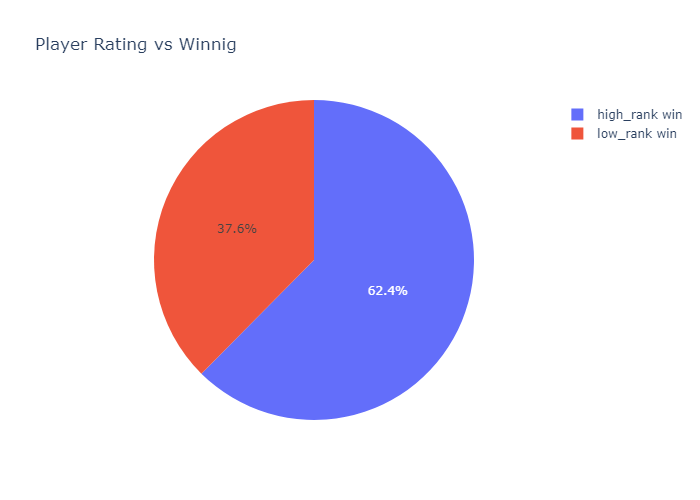

In [27]:
fig=px.pie(rate_win["win_rate_status"].value_counts(),
           names=rate_win["win_rate_status"].value_counts().index,values=rate_win["win_rate_status"].value_counts().values,
           title="Player Rating vs Winnig",
           labels={"names":"Situation ","values":"Count "})
fig.show('png')

**Insights:**

62.4% of the games are won by person with high rating

## 4.The most significant opening technique

In [28]:
opening=dt["opening_shortname"].value_counts().nlargest(5)
opening

Sicilian Defense     2236
French Defense       1305
Queen's Pawn Game    1196
King's Pawn Game      896
Queen's Gambit        827
Name: opening_shortname, dtype: int64

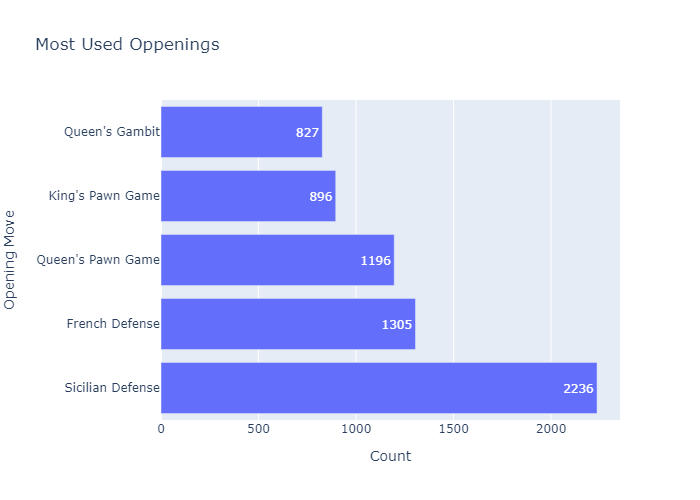

In [29]:
fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
           labels={"x":"Count ","y":"Opening Move "},
           text=opening.values)
fig.show('png')

## 5. Opening move that most frquently used in games in which black won

In [30]:
dt['moves']

game_id
1        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
2        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
3        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
4        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
5        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
                               ...                        
20054    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20055    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20056    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20057    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...
20058    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...
Name: moves, Length: 18581, dtype: object

In [31]:
dt['opening_move']=dt['moves'].str.slice(0,2)

In [32]:
black=dt[dt['winner']=='Black'].opening_move.value_counts().nlargest(5)
black

e4    5219
d4    1893
c4     285
Nf     280
e3     251
Name: opening_move, dtype: int64

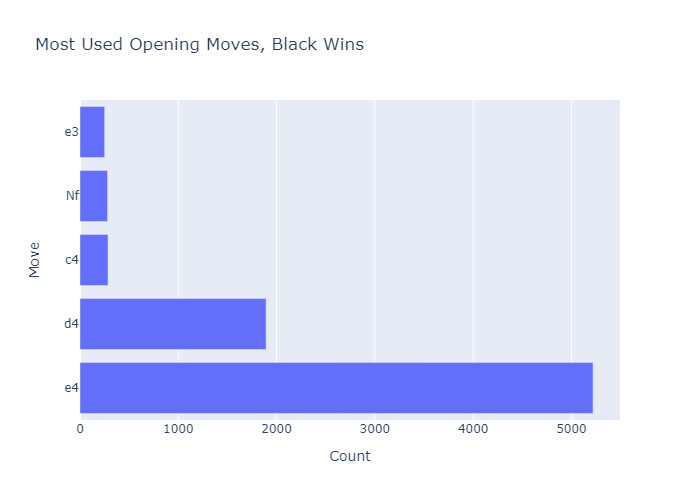

In [33]:
fig=px.bar(y=black.index,x=black.values,
          title='Most used opening moves, black wins'.title(),
          labels={'x':'Count','y':'Move'})
fig.show('png')

## 6.Opening move that most frequently used in games in which white won

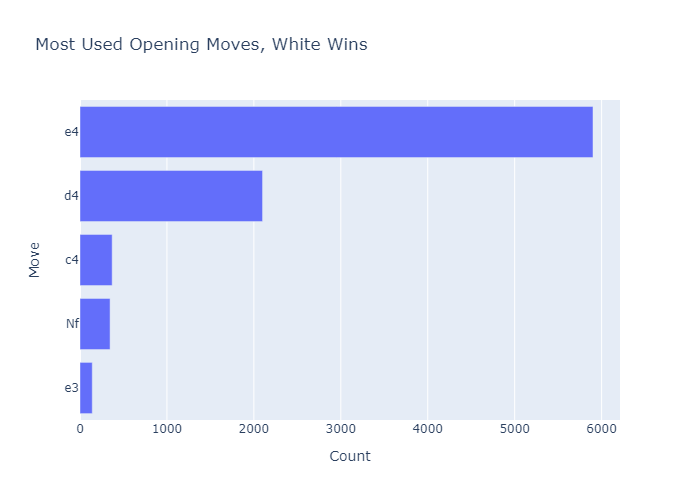

In [34]:
white=dt[dt["winner"]=="White"].opening_move.value_counts().nlargest(5)
fig=px.bar(y=white.index,x=white.values,
           title="most used opening moves, White wins".title(),
           labels={"x":"Count ","y":"Move "}).update_yaxes(categoryorder='total ascending')
fig.show('png')

**Insights:**

## Predicting the On-line Chess winner with diffrent models

**Here we are taking the winner as target and others as features. We are having Classification problem to predict**

In [35]:
dt.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'time_increment',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'moves',
       'opening_code', 'opening_moves', 'opening_fullname',
       'opening_shortname', 'opening_variation', 'opening_move'],
      dtype='object')

In [36]:
dt_p=dt.drop(['rated','victory_status', 'time_increment','white_id', 'black_id','moves','opening_fullname','opening_variation','opening_move'],axis=1)

In [37]:
dt_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18581 entries, 1 to 20058
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   turns              18581 non-null  int64 
 1   winner             18581 non-null  object
 2   white_rating       18581 non-null  int64 
 3   black_rating       18581 non-null  int64 
 4   opening_code       18581 non-null  object
 5   opening_moves      18581 non-null  int64 
 6   opening_shortname  18581 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


**Here we are having 6 features to predict the winner with 4 integer values and 2 objects**

### Label encoding of feature 'opening_shortname' & 'opening_code'

In [38]:
dt_p['opening_shortname'].nunique()

125

In [39]:
from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
dt_p['opening_shortname']=class_en.fit_transform(dt['opening_shortname'])
dt_p['opening_shortname'].unique()

array([107,  72,  60,  92,  81, 106,  11,  52, 102, 118,  38,  36,  48,
        33, 103,  88,  97,  50,  29, 124, 119,  69,  12,  91,  23,  90,
        44, 123, 100,  10,   8,  56,   0,  17,  42,  70,  13,   1,  78,
        49,  20,  34,  40,  80,  99,  82, 110,   9,  77, 105,  32,  55,
        61,  84,  85,  30,  95,  71,  58, 114,  24,  31,  62,  41, 115,
        26,  67,  18,  57, 113, 122,  15,  96,  37, 117,  83,  74,  53,
        94,  35,  39,  22,  73,  43,  68, 112,  76,   3,  86,  75,  59,
        51,  65,  93,  21,  66,   5, 111, 101,  28,  46,  47,  19,  64,
        45,  14, 109,  27,   2, 120,  54, 104,   7, 108,  79,  63,  89,
         4, 121, 116,  25,   6,  16,  87,  98])

In [40]:
dt_p['opening_code'].nunique()

265

In [41]:
dt_p['opening_code']=class_en.fit_transform(dt['opening_code'])
dt_p['opening_code'].unique()

array([194,  61, 128, 187, 149,  85, 185, 158,  62,   0, 114, 112, 164,
       162,  35,  79,  24,  80, 186, 153, 191, 104, 201,  67,  40, 109,
        82, 129,  54,  19,   4, 134, 152, 232,  36, 113,  10,  42, 121,
       221, 207, 214,  41, 208, 169, 132,  38,   8,  64,  87,  63,  74,
       108, 238, 233, 122, 136,  88,  50, 170, 102, 103, 229, 175,  72,
        81,  94,  89, 166,  71, 130, 173,  73, 180,  37, 150, 192,  90,
        21, 154,  68,   6, 165, 148,   7,   2,   3, 106, 188, 174,  29,
       142, 156, 155,  83, 172, 256, 161, 131,   5, 227,  44, 145,   9,
       111,   1,  92, 115, 141,  11,  55,  66, 105,  69, 138,  15,  97,
       118,  31, 193,  28,  13, 195, 218, 210, 202,  78, 181, 124,  47,
       264,  76, 200, 167, 228, 211, 239,  16,  95,  91, 215, 171, 182,
        46, 196, 235,  26,  20, 189, 190, 157,  93,  32, 198,  25,  99,
       244, 220, 107, 261, 133,  59, 258, 177, 135,  84,  75, 117,  27,
       209,  86, 100,  98,  48, 178,  65, 241, 206,  43, 249, 24

### Splitting of data

In [42]:
x=dt_p.drop(['winner'],axis=1)
y=pd.DataFrame(dt_p['winner'])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [44]:
x_train.shape

(13006, 6)

In [45]:
x_test.shape

(5575, 6)

In [46]:
y_train.shape

(13006, 1)

In [47]:
y_test.shape

(5575, 1)

## Linear Regression, KNN , Decision Tree & SVM

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
SEED=42
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors=11)
dtc=DecisionTreeClassifier(random_state=SEED)
svc = SVC(kernel='rbf')
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Decision Tree',dtc),('SVM',svc)]
             

In [49]:
from sklearn.metrics import accuracy_score
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.2f}'.format(class_name,accuracy))

LogisticRegression:0.63
K Nearest Neighbors:0.61
Decision Tree:0.58
SVM:0.63


## Voting classifier, Random forest, Gradient Boosting & Extreme gradient boosting Model

In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
SEED = 42
vc=VotingClassifier(estimators=classifiers)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
classifiers=[('Voting Classifier',vc),('Random Forest',rf),('Gradient Boosting',gb),('Extreme Gradient Boosting',xgb)]


In [51]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.2f}'.format(class_name,accuracy))

Voting Classifier:0.63
Random Forest:0.66
Gradient Boosting:0.72
[15:26:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting:0.85


**Model prediction Accuracy table**

|Model|Accuracy_Score|
|---|:-:|
|Logistic Regression|0.63|
|kNN|0.61|
|Decision Tree|0.58|
|Radial SVM|0.63|
|Voting Classifier|0.63|
|Random Forest|0.66|
|Gradient Boosting|0.72|
|**Extreme Gradient Boosting**|**0.85**|

### Here the best fit for our prediction is Extreme Gradient Boosting model with 85% accuracy.

**As further step we can try tuning of hyperparameters and feature reduction in the model and check if the accuracy can be increased**

# Fine Tuning of hyper parameters in Extreme Gradient Boosting model

In [52]:
xgb.fit(x_train,y_train)

[15:26:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
xgbt=XGBClassifier(n_estimators=500,max_depth=10,random_state=42)
xgbt.fit(x_train,y_train)

[15:26:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
y_pred=xgbt.predict(x_test)
round(accuracy_score(y_test,y_pred),2)

0.84

**After fine tuning of hyperparameters the accuracy score reduced from 85% to 84%. So its not advisable in this modelling**

### Checking feature importance in Extreme Gradient Model

In [55]:
pd.Series(xgb.feature_importances_,index=x.columns).sort_values(ascending=False)*100

turns                44.346325
white_rating         17.930864
black_rating         14.190485
opening_code          8.429999
opening_shortname     7.742883
opening_moves         7.359448
dtype: float32

**Here all the features are having importance so its not advisable to drop any of the features**